## ARIMA Models

- Time Series are everywhhere.
  
  * Fitting an ARIMA model.
  * Optimizing the model.
  * Making forecasts.
  * Calculating uncertainity in predictions.

Sample code:

df = pd.read_csv('time_series.csv',index_col='date',parse_dates=True)

- parse the date into datetime data-type.

#### Trend
- One important feature of a time series is its trend.
- A positive trend is a line that generally slopes up - the values increase with time. 
- Similarly, a negative trend is where the values decrease.

#### Seasonality
- A seasonal time series has patterns that repeat at regular intervals, for example high sales every weekend.

#### Cyclicality
- Cyclicality is where there is a repeating pattern but no fixed period.

### White Noise

- White noise is an important concept in time series and ARIMA models.
- White noise is a series of measurements, where each value is uncorrelated with previous values.

#### Stationarity

- To model a time series, it must be stationary. 
- Stationary means that the distribution of the data doesn't change with time. - For a time series to be stationary it must fulfill three criteria. These are: 
     * The series has zero trend, it isn't growing or shrinking.
     * The variance is constant. The average distance of the data points from the zero line isn't changing.
     * And the autocorrelation is constant. How each value in the time series is related to its neighbors stays the same.


- Statistical tests for stationarity
- Making a dataset stationary.

##### Augmented Dickey Fuller Test

- Checks for trend non-stationarity.
- Null hypothesis: Time Series is non-stationary.

- Implementation in python:
  
     from statsmodels.tsa.stattools import adfuller
     results = adfuller(df['close'])

- Results are a tuple, where the zeroth element is the test statistic.

- The more negative the test statistic, the more likely to be stationary.
'
- The 1st element is the p-value -> 0.60


##### Making a time series Stationary -> Feature Engineering

1. Differencing - in python .diff()
2. Take the log, or the square root of a time series, or to calculate the proportional change. 



### Intro to AR,MA and ARIMA models

#### AR Model

- In an autoregressive model we regress the values of the time series against previous values of this same time series. 

- AR(1) model : $ y_t = a_1 y_t-1 + e_t $

- The $e_t$ is a shock term, which is a white noise.

- Compare this to a simple linear regression where the dependent variable is $y_t$ and the independent variable is $y_t-1$.The coefficient $a_1$ is just the slope of the line and the shocks are the residuals to the line.

- The order of the model is the number of time lags used. AR(p), p is the order of the AR model.



#### MA Model

- In a moving average model we regress the values of the time series against the previous shock values of this same time series. 

- MA(1) model : $ y_t = m_1 e_t-1 + e_t$

- Value of the shock at the previous step; plus a shock term for the current time step.

- MA(q), q is the order of the MA model.

#### ARMA Model

- ARMA = AR + MA

- The time series is regressed on the previous values and the previous shock terms. 

-  ARMA(1,1) : $y_t = a_1 y_t-1 + m_1 e_t-1 + e_t$

- p is the order of AR part.
- q is the order of MA part.


##### Creating ARMA Data
 $y_t = 0.5 y_t-1 + 0.2 e_t-1 + e_t$

In [1]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1,-0.5]  # will be converted to +0.5 in the actual equation
ma_coefs= [1,0.2]
y = arma_generate_sample(ar_coefs,ma_coefs,nsample=100,scale=0.5)

##### Fitting an ARMA model

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Instatiate model object
model = ARIMA(y, order=(1,0,1))
# fit the model
results = model.fit()

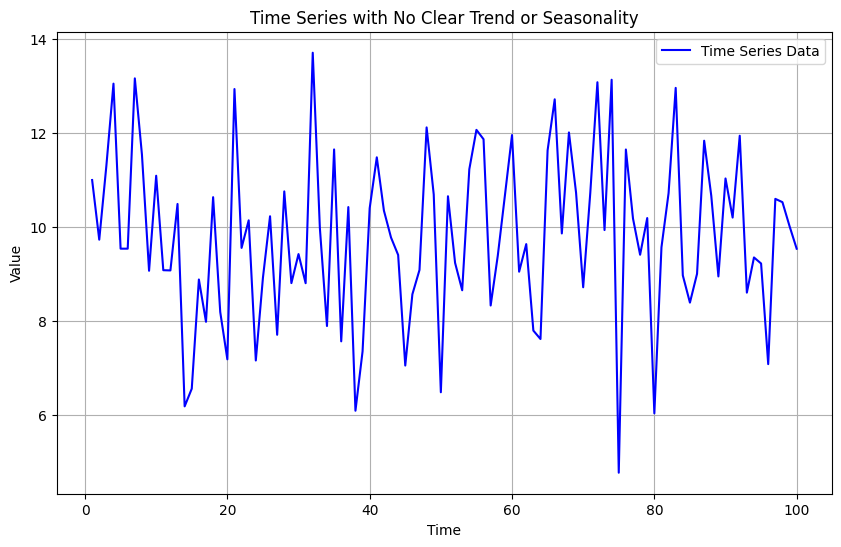

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a time series with no clear trend or seasonality
np.random.seed(42)
time = np.arange(1, 101)
data = np.random.normal(loc=10, scale=2, size=100)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Time Series Data', color='blue')
plt.title('Time Series with No Clear Trend or Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


##### Fitting time Series Models

In [1]:
# Creating a model
from statsmodels.tsa.arima.model import ARIMA 

- Creating an AR model
ar_model = ARIMA(timeseries,order=(p,0,0))

- Creating an MA model
ma_model = ARIMA(timeseries,order=(0,0,q))


##### ARMAX Models
- Exgoneous ARMA
- ARMAX = ARMA + linear regression

     ARMA(1,1) :$ y_t = a_1 y_t-1 + m_1 e_t-1 + e_t$

     ARMAX(1,1) : $y_t = x_1 z_t + a_1 y_t-1 + m_1 e_t-1 + e_t$

- Example of ARMAX
Imagine you wanted to model your own daily personal productivity. This could reasonably be an ARMA model as your productivity on previous days may have an effect on your productivity today. You could be overworked or just on a roll.

A useful exogenous variable could be the amount of sleep you got the night before since this might affect your productivity. Here z-one would be hours slept, and if more sleep made you more productive then the coefficient x-one would be positive.

- Implementing this in python:

model = ARIMA(df['productivity'],order =(2,0,1),exog =df['hours_sleep'])

#### Forecasting

- At any point in the time series we can estimate the next series value. We make this prediction by multiplying the previous value by the lag-one AR coefficient.

-  If the previous value was 10 and coefficient a-one is 0.6, we would estimate the next value as 6.

- If the shock term had a standard deviation of 1, we would predict our lower and upper uncertainty limits to be 5 and 7.


#### Forecasting in sample

##### One step ahead predictions

In the time period we have data for, we can make lots of these predictions in-sample; using the previous series value to estimate the next ones. This is called a one-step-ahead prediction. 

This allows us to evaluate how good our model is at predicting just one value ahead. 

Here, the mean prediction is marked with a red line while the uncertainty range is shaded. The uncertainty is due to the random shock terms that we can't predict.

- Implementing one-step ahead in Python

 -Making predictions for last 25 values
     results = model.fit()

- Making in-sample predictions

     forecast = results.get_prediction(start =-25)  

We set the start parameter as a negative integer stating how many steps back to begin the forecast.    

- The central value of the forecast is stored in 

     mean_forecast = forecast.predicted_mean

- The confidence intervals of forecasts

     confidence_intervals = forecast.conf_int()

- Plotting the predictions

     plt.plot(dates, mean_forecast.values,color='red',label ='forecast')

     - Shading the uncertainity area

     plt.fill_between(dates,lower_limits,upper_limits,color='pink')
     plt.show()

##### Dynamic Predictions

- We can make predictions further than just one step ahead.

- To make these dynamic predictions we predict one step ahead, and use this predicted value to forecast the next value after that, and so on. 

- Implementing in python:

     results = model.fit()
     forecast = result.get_predictions(start= -25, dynamic = True) 


#### Forecasting Out of sample

- To predict the future.

- Implementing in python

     forecast = results.get_forecast(steps = 20)
     



#### Introduction to ARIMA Models

- Forecasting and non-stationarity.
- You cannot apply an ARMA model to non-stationary time series, hence we have to difference it.
- However, when we do this, we will have a model which is trained to predict the value of the difference of the time series. What we really want to predict is the not the difference, but the actual value of the time series. We can achieve this by carefully transforming our predictions of the differences.


- Reconstructing original ts after differencing. 

     -Obtaining predictions of the differenced values:
         diff_forecast = results.get_forecast(steps=10).predicted_mean

    - The opposite of taking the difference is taking the cumulative sum or integral. We will need to use this transform to go from predictions of the difference values to predictions of the absolute values.  
        
         from numpy import cumsum
         mean_forecast = cumsum(diff_forecast) #we now have a prediction of how much the time series changed from its initial value over the forecast period.

     - To get an absolute value we need to add the last value of the original time series:

         mean_forecast = cumsum(diff_forecast) + df.iloc[-1,0]
          
     - We now have a forecast of the non-stationary time series.       
            

- The ARIMA reduces the process of going through all these steps.

- Implementation in python 
     from statsmodels.tsa.arima.model import ARIMA
     model = ARIMA(df, order =(p,d,q))

- Is used with a non-stationary time series.

- Picking the difference order (we difference our data until it is statonary)     
     
     - This has to be worked out before fitting the model using ADF test to decide the difference order.
     - 


##### Intro to ACF and PACF

- How do we choose which ARIMA model to fit?
- The model order is very important to the quality of forecasts.
- One of the main ways to identify the correct model order is by using the autocorrelation function, the ACF, and the partial autocorrelation function the PACF.
- Plotting the ACF:
     If these values are small and lie inside the blue shaded region, then they are not statistically significant.
- PACF : is the correlation associated with just that particular lag.    

- Implementation in python:

     from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

     fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
     plot_acf(df,lags =10,zero = False, ax=ax1) 
     - acf and pacf at lag 0 is 1, hence we set zero = false
     plot_pacf(df,lags =10,zero = False, ax=ax1) 
      
     
- Note : 
   
     If the ACF values are high and tail off very very slowly this is a sign that the data is non-stationarity, so it needs to be differenced.

     If the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times.




##### Intro to AIC and BIC

- AIC -> Akaike Information Criteria, is a metric which tells us how good a model is.
- A model which makes better predictions is given a lower AIC score. 
- The AIC also penalizes models which have lots of parameters. This means if we set the order too high compared to the data, we will get a high AIC value. This stops us overfitting to the training data.
- BIC -> Bayesian Information Criteria, is very similar to the AIC.
- Models which fit the data better have lower BICs and the BIC penalizes overly complex models.

- AIC vs BIC
     - For both of these metrics a lower value suggests a better model. 
     - The difference between these two metrics is how much they penalize model complexity.
     - The BIC penalizes additional model orders more than AIC and so the BIC will sometimes suggest a simpler model.
     - If our goal is to identify good predictive models, we should use AIC.
     - if our goal is to identify a good explanatory model, we should use BIC.

-  Implementation in python:
     -We can find the AIC and BIC by using the summary of the fitted-models-results object.
     - Method 2: results.aic , results.bic

     - Searching over AIC and BIC(use of loops)

         for p in range(3):

             #loop over MA order

             for q in range(3):

                 try:

                 #fit model

                 model = ARIMA(df,order = (p,0,q))

                 results = model.fit()

                     #print the model order 

                     print(p,q,results.aic,results.bic)

                 except: 
                       print(p, q, None, None)
             







##### Model Diagnostics

- How good is the final model?
- To diagnose our model we focus on the residuals to the training data.
- The residuals are the difference between the our model's one-step-ahead predictions and the real values of the time series.

- To access the residuals in python:

     residuals = results.resid

- How far are our predictions from the real values - Mean Absolute Error.

      mae = np.mean(np.abs(residuals))

- If the model fits well, the residuals will be white Gaussian noise.

       results.plot_diagnostics()

      plt.show()
- Residuals plot: 
- Histogram -The histogram shows us the measured distribution; the orange line shows a smoothed version of this histogram; and the green line, shows a normal distribution. If our model is good these two lines should be almost the same. 
- Normal Q-Q plot : If our residuals are normally distributed then all the points should lie along the red line, except perhaps some values at either end.
- Correlogram : which is just an ACF plot of the residuals rather than the data.  95% of the correlations for lag greater than zero should not be significant. If there is significant correlation in the residuals, it means that there is information in the data that our model hasn't captured.
- Summary statistics:
     - Prob(Q) is the p-value associated with the null hypothesis that the residuals have no correlation structure.
     - Prob(JB) is the p-value associated with the null hypothesis that the residuals are Gaussian normally distributed.
     - If either p-value is less than 0.05 we reject that hypothesis.




#### Box-Jenkins Method

- The Box-Jenkins method is a kind of checklist for you to go from raw data to a model ready for production.

- The three main steps that stand between you and a production-ready model are:
     - Identification
     - Estimation
     - Model diagnostics
-  Identification
     - Is the time series stationary? df.plot() ; adfuller()
     - What differencing will make it stationary? df.diff();np.log(); np.sqrt()
     - What transforms will make it stationary? plot_acf; plot_pacf
     - What values of p and q are most promising?

- Estimation
     - Using numerical methods to estimate the AR and MA coefficients of the data. model.fit()
     -  Aic and Bic

- Model Estimation
     - Evaluate the quality of the best fitting model.
     -  Are the residuals uncorrelated.
     - Are residuals normally distributed. 
         results.plot_diagnostics()
         results.summary()

- If the residuals are okay then we can go ahead and make forecasts!

-             


##### Seasonal Time Series

- Seasonal data has predictable and repeated patterns.
- Repeats after any amout of time.
- Seasonal component = trend + seasonal component + residual
- To separate a time series into this three components:

            from statsmodels.tsa.seasonal import seasonal_decompose
     
     - set the period parameter,which is the number of data points in each repeated cycle - cycle repeats every 12 steps.

            decomomp_results = seasonal_decompose(df['IPG3113N'],period=12)

           type(decomp_results)

    - Plotting the decomposed data
    
            decomp_results.plot()

           plt.show()

- In order to decompose the data, we need to know how often the cycles repeat. The ACF can be used to identify the period. The ACF shows a periodic correlation pattern. 
- To find the period we look for a lag greater than one, which is a peak in the ACF plot.  
-  There is a peak at 12 lags and so this means that the seasonal component repeats every 12 time steps.    



##### Identifying Seasonal Data using ACF

- Sometimes it can be hard to tell by eye whether a time series is seasonal or not.
- This is where the ACF is particularly useful.
- The time series has to  be detrended first, for the ACF plot to be clearer.
- This time we are only trying to find the period of the time series, and the ACF plot will be clearer if we just subtract the rolling mean.

           df = df - df.rolling(N).mean()

           df = df.dropna()
- Identifying seasonal data using ACF

         fig, ax = plt.subplots(1,1, figsize=(8,4))

         plot_acf(df.dropna(),ax=ax,lags=25,zero=False)

         plt.show()           

- Since the data is seasonal we will always have correlated residuals left if we try to fit an ARIMA model to it.
-  This means that we aren't using all of the information in the data, and so we aren't making the best predictions possible. 

### Sarima Models

- How to use that seasonality to make more accurate predictions.
- A SARIMA or seasonal ARIMA model is the tool of choice for seasonal time series.
- Fitting a SARIMA model is like fitting two different ARIMA models at once, one to the seasonal part and another to the non-seasonal part.
- Hence we will have two orders:

     SARIMA(p,d,q)(P,D,Q)s

    - We have non-seasonal orders for the autoregressive, difference and moving average parts. We also have this set of orders for the seasonal part. We use capital P, D and Q for these seasonal orders. There is also a new order, S, which is the length of the seasonal cycle.

 


##### Comparison of ARIMA and SARIMA

ARIMA(2,0,1): $y_t = a_1 y_t-1 + a_2 y_t-2 + m_1 e_t-1 + e_t$

$SARIMA(0,0,0)(2,0,1)_7$ : $y_t = a_7 y_t-7 + a_14 y_t-14 + m_7 e_t-7 + e_t$

- The SARIMA model only has a seasonal part with a season length of 7 days.


